In [1]:
#Import Dependencies & set Reference URL for Scrape
import pandas as pd
import geopandas as gp

worldview_url = 'https://rcdb.com/location.htm'

In [2]:
worldview_tables = pd.read_html(worldview_url)

In [3]:
#Scrape Worldview Table and save as a dataframe.
worldview = worldview_tables[1]
worldview.head()

,Location,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,18627.997587,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4261.180756,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,42296.835788,0.260067
3,Cuba,3,0.000515,11484636,0.261219,42872.359189,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,19842.543943,0.302381


In [4]:
#Rename the Location column for later merging with GeoJSON file
coasters = worldview.rename(columns = {'Location': 'ADMIN'}, inplace=False)

In [6]:
#Export to CSV to review data for cleaning
coasters.to_csv("CSVs/coasters.csv")

In [10]:
#Replace "-" with 0 for all values
coasters.replace({"-": 0}, inplace=True)
coasters

,ADMIN,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,1.862800e+04,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4.261181e+03,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,4.229684e+04,0.260067
3,Cuba,3,0.000515,11484636,0.261219,4.287236e+04,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,1.984254e+04,0.302381
...,...,...,...,...,...,...,...
171,Cape Verde,0,0,539560,0,1.585070e+03,0
172,SÃ£o TomÃ© and PrÃ­ncipe,0,0,199910,0,3.886657e+02,0
173,Comoros,0,0,850688,0,6.486728e+02,0
174,Australia,30,0.005148,24450561,1.226966,2.974432e+06,0.010086


In [13]:
#Clean up country names that transferred with typos 
coasters.replace({"CuraÃ§ao": "Curaçao", "CÃ´te d'Ivoire": "Ivory Coast", "SÃ£o TomÃ© and PrÃ­ncipe": "Sao Tome and Principe"}, inplace=True)
coasters

,ADMIN,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Dominican Republic,3,0.000515,10766998,0.278629,1.862800e+04,0.161048
1,Jamaica,2,0.000343,2890299,0.691970,4.261181e+03,0.469353
2,Guatemala,11,0.001888,16913503,0.650368,4.229684e+04,0.260067
3,Cuba,3,0.000515,11484636,0.261219,4.287236e+04,0.069975
4,Costa Rica,6,0.001030,4905769,1.223050,1.984254e+04,0.302381
...,...,...,...,...,...,...,...
171,Cape Verde,0,0,539560,0,1.585070e+03,0
172,Sao Tome and Principe,0,0,199910,0,3.886657e+02,0
173,Comoros,0,0,850688,0,6.486728e+02,0
174,Australia,30,0.005148,24450561,1.226966,2.974432e+06,0.010086


In [7]:
countries = gp.read_file('countries.geojson')

In [8]:
countries.head()

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."


In [9]:
countries

,ADMIN,ISO_A3,geometry
0,Aruba,ABW,"POLYGON ((-69.99694 12.57758, -69.93639 12.531..."
1,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903..."
2,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993..."
...,...,...,...
250,Samoa,WSM,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619..."


In [10]:
coasters_and_countries = countries.merge(coasters, on='ADMIN')

In [11]:
coasters_and_countries.head()

,ADMIN,ISO_A3,geometry,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",1,0.000172,35530081,0.028145,248707.695316,0.004021
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",2,0.000343,29784193,0.067150,483544.314606,0.004136
2,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",1,0.000172,2930187,0.341275,11081.537910,0.090240
3,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",2,0.000343,76965,25.985838,174.232555,11.478911
4,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",55,0.009439,9400145,5.850974,27555.464581,1.995974


In [12]:
coasters_and_countries

,ADMIN,ISO_A3,geometry,Roller Coasters,%,Population,RCMP,Area (sq mi),Density
0,Afghanistan,AFG,"POLYGON ((71.04980 38.40866, 71.05714 38.40903...",1,0.000172,35530081,0.028145,248707.695316,0.004021
1,Angola,AGO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",2,0.000343,29784193,0.067150,483544.314606,0.004136
2,Albania,ALB,"POLYGON ((19.74777 42.57890, 19.74601 42.57993...",1,0.000172,2930187,0.341275,11081.537910,0.090240
3,Andorra,AND,"POLYGON ((1.70701 42.50278, 1.69750 42.49446, ...",2,0.000343,76965,25.985838,174.232555,11.478911
4,United Arab Emirates,ARE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",55,0.009439,9400145,5.850974,27555.464581,1.995974
...,...,...,...,...,...,...,...,...,...
159,Vietnam,VNM,"MULTIPOLYGON (((106.66871 8.75349, 106.66586 8...",75,0.012871,95540800,0.785005,127572.847359,0.587899
160,Yemen,YEM,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",7,0.001201,28250420,0.247784,175238.069120,0.039946
161,South Africa,ZAF,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",10,0.001716,56717156,0.176313,471612.922092,0.021204
162,Zambia,ZMB,"POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...",1,0.000172,17094130,0.058500,290886.081593,0.003438


In [13]:
countries_and_coasters = coasters.merge(countries, on='ADMIN')
countries_and_coasters.head()

,ADMIN,Roller Coasters,%,Population,RCMP,Area (sq mi),Density,ISO_A3,geometry
0,Dominican Republic,3,0.000515,10766998,0.278629,18627.997587,0.161048,DOM,"MULTIPOLYGON (((-71.50739 17.55126, -71.52448 ..."
1,Jamaica,2,0.000343,2890299,0.691970,4261.180756,0.469353,JAM,"POLYGON ((-76.26374 18.01236, -76.25678 17.996..."
2,Guatemala,11,0.001888,16913503,0.650368,42296.835788,0.260067,GTM,"POLYGON ((-89.16050 17.81431, -89.15622 17.598..."
3,Cuba,3,0.000515,11484636,0.261219,42872.359189,0.069975,CUB,"MULTIPOLYGON (((-78.38419 20.56216, -78.36726 ..."
4,Costa Rica,6,0.001030,4905769,1.223050,19842.543943,0.302381,CRI,"MULTIPOLYGON (((-87.09903 5.51602, -87.11767 5..."


<AxesSubplot:>

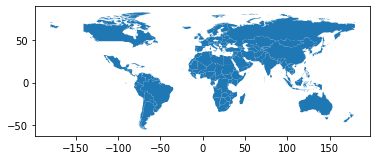

In [14]:
coasters_and_countries.plot()

In [15]:
coasters_and_countries.to_file("countries_and_coasters.geojson", driver='GeoJSON')

In [16]:
census_url = 'https://rcdb.com/census.htm'
tables = pd.read_html(census_url)
census = tables[1]
census.head()

Unnamed: 0_level_0    Steel                                                  \
            Location Sit Down Inverted Suspended Wing Flying Stand Up Bobsled   
0      North America      713       47        14   13     10        4       3   
1             Europe     1261       30        19    8      8        2       4   
2               Asia     2630       85        27    9      7        4       -   
3      South America      163        6         5    -      -        -       -   
4             Africa       96        2         -    -      -        -       -   

               Wood         Totals                
  Pipeline Sit Down Bobsled  Steel Wood Combined  
0        -      117       1    804  118      922  
1        -       39       -   1332   39     1371  
2        4       23       -   2766   23     2789  
3        -        1       -    174    1      175  
4        -        -       -     98    -       98

In [17]:
census.to_json("census.json", orient = 'records')

,Rank,Speed,Roller Coaster,Amusement Park (Location),Opened
0,1st,149.1 mph,Formula Rossa,"Ferrari World Abu Dhabi (Abu Dhabi, Abu Dhabi,...",NaN
1,2nd,128 mph,Kingda Ka,"Six Flags Great Adventure (Jackson, New Jersey...",NaN
2,3rd,120 mph,Top Thrill Dragster,"Cedar Point (Sandusky, Ohio, United States)",NaN
3,4th,111.8 mph,Do-DodonpaRed Force,"Fuji-Q Highland (Fujiyoshida, Yamanashi, Japan...",NaN
4,5th,100 mph,Superman: Escape from Krypton,"Six Flags Magic Mountain (Valencia, California...",NaN
5,*,99.4 mph,Ring Racer,"NÃ¼rburgring (NÃ¼rburg, Rhineland-Palatinate, ...",NaN
6,6th,95 mph,Steel Dragon 2000Fury 325,"Nagashima Spa Land (Kuwana, Mie, Japan)Carowin...",NaN
7,7th,93 mph,Millennium Force,"Cedar Point (Sandusky, Ohio, United States)",NaN
8,8th,92 mph,Leviathan,"Canada's Wonderland (Vaughan, Ontario, Canada)",NaN
9,9th,91 mph,Orion,"Kings Island (Mason, Ohio, United States)",NaN


ValueError: Columns must be same length as key